## EDA(Exploratory Data Analysis)

1. Load the data set

2. Clean data (missing values, duplicates, types)

3. treat outliers

4. univariate ,bivariate and multivariate Analysis

5. insights 


### Outlier -a data point that is significantly different from other observations in a dataset.

### How outliers will come ....?

1. Measurement error

2. data entry mistakes

### Why they are important ...?

1. They can be errors

2. They effect the data analysis

### How to Identify the outliers...?

1. Statistical methods

---> Interquartile Range(IQR)

---> Z-score

2. Visualisation Techniques

---> Box plots

---> Scatter plots

---> Histograms


### Univariate analysis - a method that analayzes a single variable to describe its  characteristics, find patterns and summarise data.
#### It invloves only one variable.

### Bivariate analysis - it will give the relationship between 2 variables.It helps to find if there is an any correlation between the two variables and any association or any connection between th teo variables
#### It involves 2 varaibles (X & Y).

### Multivariate analysis - To understand how multiple factors interact & influence each other.
#### It involves more thsn 2 
Example - 
How our age, income, and education level together influence the purchasing behaviour.

## ETL (Extract transform and load)


### EDA : <Dataset>

1. Load and Overview the dataset 

2. cleaning (missing, dupes, dtypes)

3. Univariate , Bivariate & Multivariate analysis

4. Outlier - IQR

5. Feature Engineering 

6. Key Insigths



### Feature Engineering  - " F.E is the process of turning  raw data into useful features " that helps to improve the performance of machine learning models.

#1. Load libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Basic Information and Overview
print("shape of the dataset:", df.shape)
print("\n Data Info :\n")
df.info()

#Summary statistics
df.describe(include='all')


shape of the dataset: (891, 15)

 Data Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Missing values analysis
missing=pd.DataFrame(
    {
        'missing_count':df.isnull().sum(),
        'missing_percentage':(df.isnull().sum()/len(df))*100
    }
)

missing.sort_values(by='missing_percentage', ascending=False)

,missing_count,missing_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [6]:
# 4. Handling Missing values

# Fill the numeric missing values with the mean

df['age']=df['age'].fillna(df['age'].mean())

# Fill categorical missing values with the mode

df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

# drop 'deck' column (too many missing values )

print("missing values before dropping the column:", df.isnull().sum().sum())

missing values before dropping the column: 690


In [7]:
#Duplicates and Data type check

print("Duplicate rows:", df.duplicated().sum())

#convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')

df.info()

Duplicate rows: 107
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(3)
memory usage: 68.7+ KB


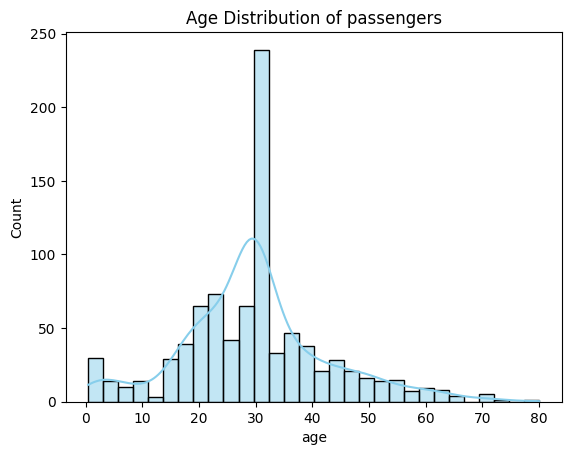

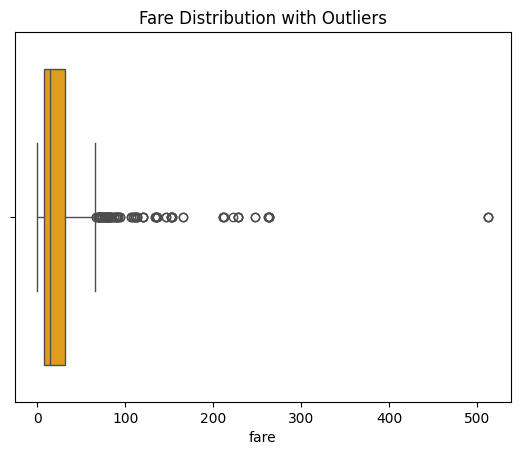

In [9]:
# 6. Univariate analysis - Numerical Features 
num_cols=df.select_dtypes(include=['int64','float64']).columns
df[num_cols].describe()

#Histogram : Age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age Distribution of passengers")
plt.show()

# Boxplot : Fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare Distribution with Outliers")
plt.show()

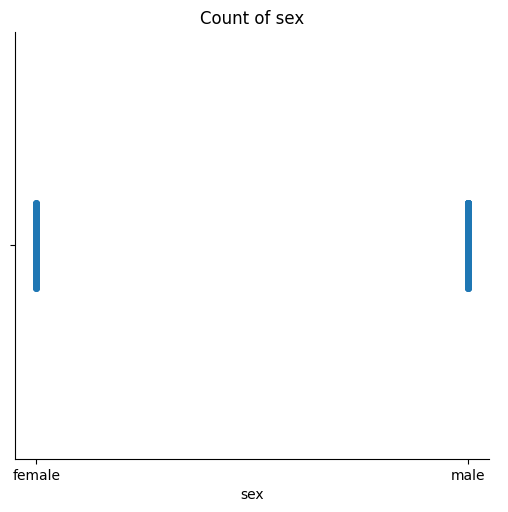

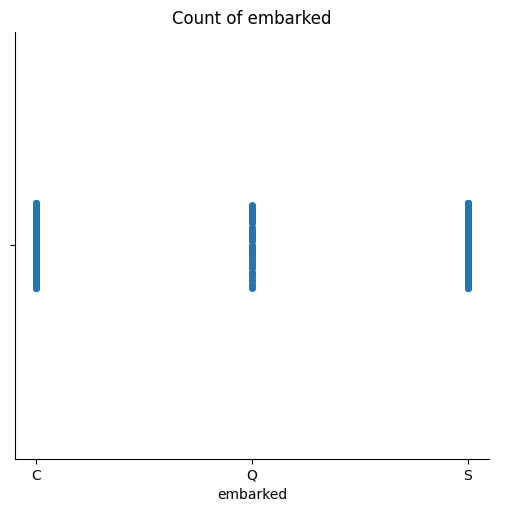

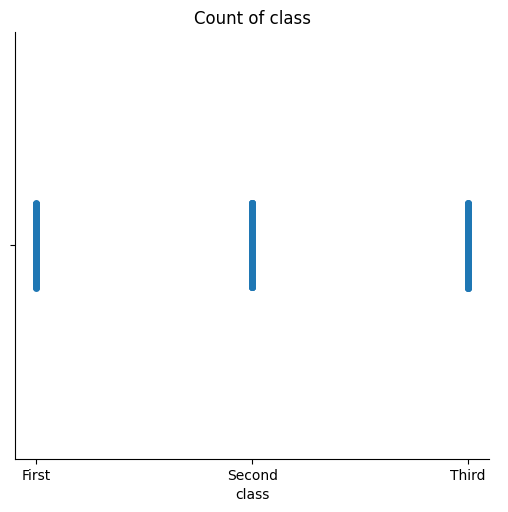

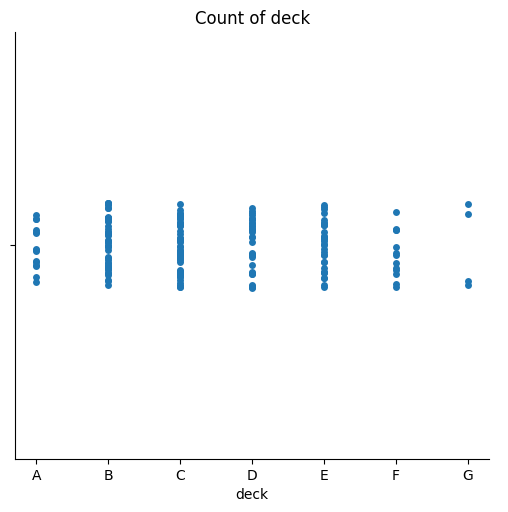

In [12]:
# Univariate Analysis - Categorical Features

cat_cols = df.select_dtypes('category').columns
for col in cat_cols :
    sns.catplot( x=col , data=df)
    plt.title(f"Count of {col}")
    plt.show()

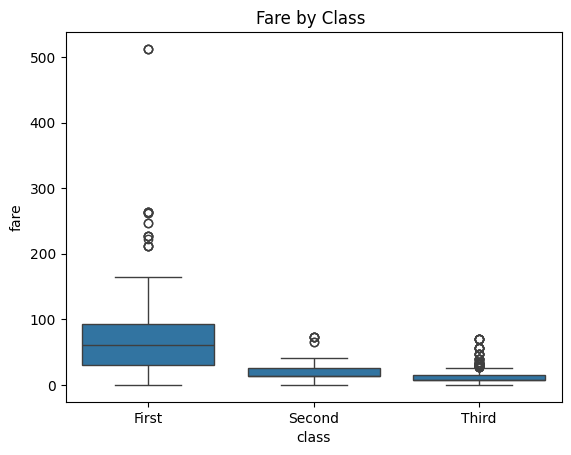

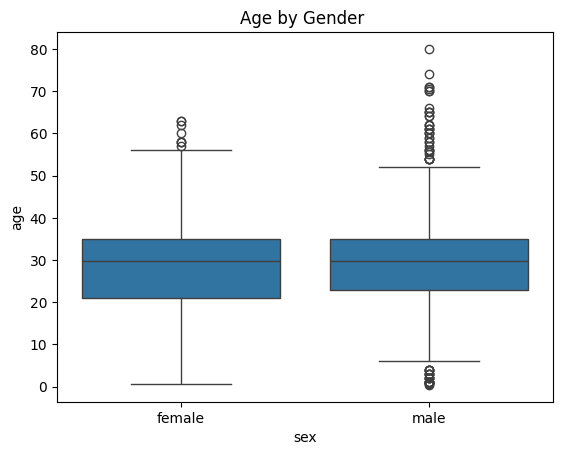

In [10]:
# Bivariate Analysis - Numerical vs Categorical

sns.boxplot(x='class', y='fare', data=df)
plt.title("Fare by Class ")
plt.show()

sns.boxplot(x='sex', y='age', data=df)
plt.title("Age by Gender ")
plt.show()

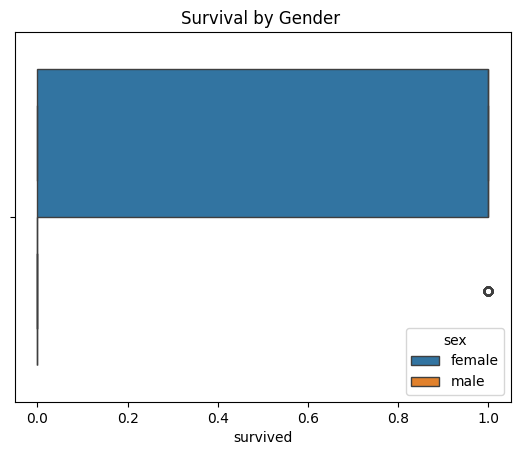

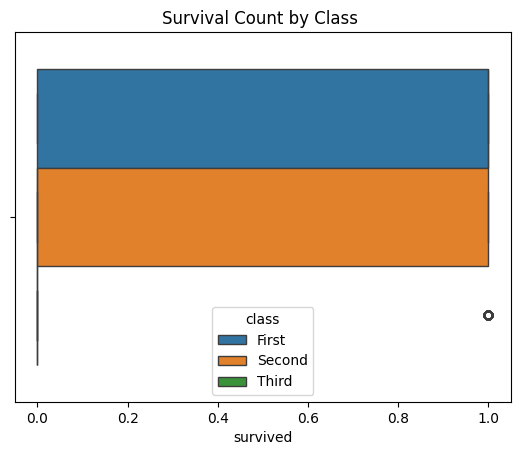

In [13]:
# Bivariate Analysis - Categorical vs Categorical

sns.boxplot(x='survived', hue='sex', data=df)
plt.title("Survival by Gender ")
plt.show()


sns.boxplot(x='survived', hue='class', data=df)
plt.title("Survival Count by Class ")
plt.show()

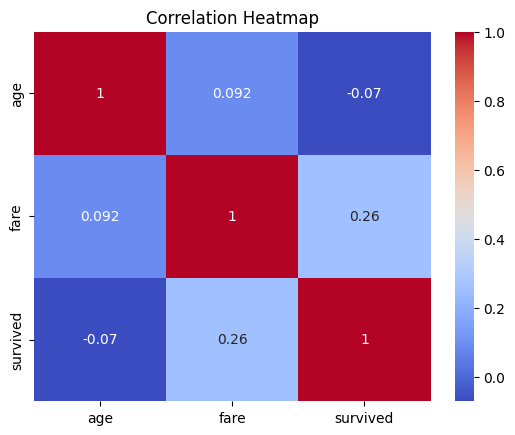

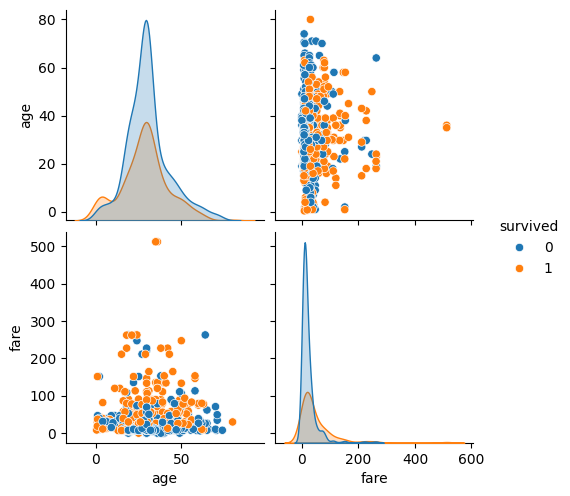

In [15]:
#Correaltion and multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']], hue='survived')
plt.show()

Insights :
1. Fare has a positive correlation with survival

2. Age shows a slight negative correlation with survival


No.of outliers in Fare :  116


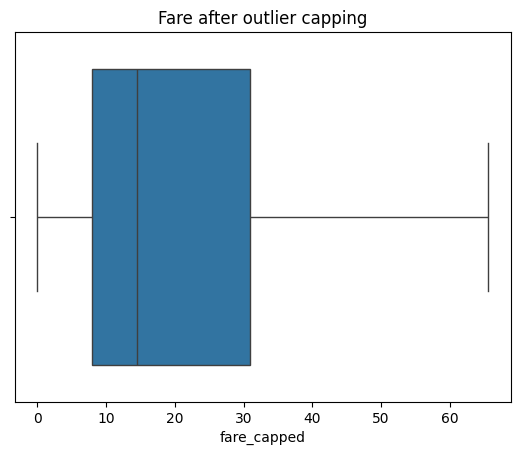

In [17]:
# Outliers Detection using IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df['fare'] < lower ) | (df['fare'] > upper )]
print("No.of outliers in Fare : ", len(outliers))

# Outliers
df['fare_capped'] = df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

In [18]:
# Feature Engineering 

# Create new features

df['family_size'] = df['sibsp'] + df['parch']

df['is_alone'] = (df['family_size'] == 1).astype(int)

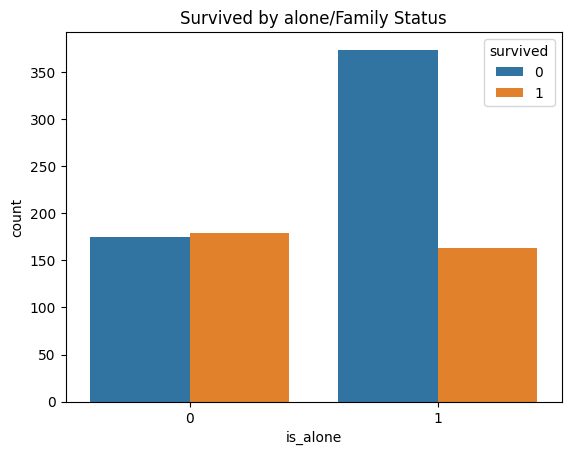

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [19]:
# Feature Engineering 

# Create new features

df['family_size'] = df['sibsp'] + df['parch']+1

df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x='is_alone' , hue='survived' , data=df)
plt.title("Survived by alone/Family Status")
plt.show()

df[['family_size' , 'is_alone' , 'survived']].head()

In [20]:
# Export the  Cleaned date
df.to_csv("Titanic_cleaned.csv" , index=False)
print("\n Cleaned Titanic data saved as titanic_cleaned.csv")


 Cleaned Titanic data saved as titanic_cleaned.csv


In [21]:
import os
print(os.getcwd())

c:\Users\sreej\OneDrive\DataAnalysis_tekworks\DataAnalysis
